In [1]:
%load_ext zipline

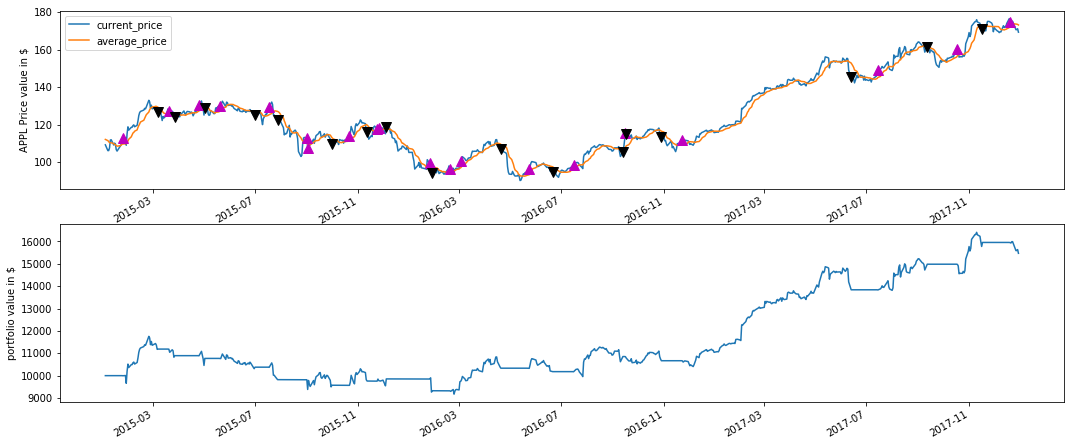

,algo_volatility,algorithm_period_return,alpha,average_price,benchmark_period_return,benchmark_volatility,beta,capital_used,current_price,ending_cash,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,0.000000,NaN,112.2050,-0.000535,NaN,NaN,0.00000,109.330,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,1,[],0.0
2015-01-05 21:00:00+00:00,0.000000,0.000000,0.000000,111.5650,-0.018585,0.196720,0.000000,0.00000,106.250,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,2,[],0.0
2015-01-06 21:00:00+00:00,0.000000,0.000000,0.000000,111.0130,-0.027829,0.139106,0.000000,0.00000,106.260,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,3,[],0.0
2015-01-07 21:00:00+00:00,0.000000,0.000000,0.000000,110.4940,-0.015715,0.206973,0.000000,0.00000,107.750,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,4,[],0.0
2015-01-08 21:00:00+00:00,0.000000,0.000000,0.000000,110.4290,0.001752,0.236042,0.000000,0.00000,111.890,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,5,[],0.0
2015-01-09 21:00:00+00:00,0.000000,0.000000,0.000000,110.4290,-0.006276,0.218112,0.000000,0.00000,112.010,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,6,[],0.0
2015-01-12 21:00:00+00:00,0.000000,0.000000,0.000000,109.9550,-0.014060,0.203322,0.000000,0.00000,109.250,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,7,[],0.0
2015-01-13 21:00:00+00:00,0.000000,0.000000,0.000000,109.5860,-0.016834,0.188302,0.000000,0.00000,110.220,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,8,[],0.0
2015-01-14 21:00:00+00:00,0.000000,0.000000,0.000000,109.3140,-0.022769,0.177394,0.000000,0.00000,109.800,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,9,[],0.0
2015-01-15 21:00:00+00:00,0.000000,0.000000,0.000000,108.9580,-0.031722,0.170558,0.000000,0.00000,106.820,10000.000000,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,10,[],0.0


In [52]:
%%zipline --start 2015-1-1 --end 2018-1-1 --capital-base 10000 -o ../data/strategy2.0.pickle

import talib
import matplotlib.pyplot as plt
from talib import EMA
from zipline.api import (
    sid, 
    symbol,
    schedule_function, 
    date_rules, 
    order_target_percent,
    record)
"""
For this example, we're going to write a simple momentum script.  
When the stock goes up quickly, we're going to buy; 
when it goes down we're going to sell.  
Hopefully we'll ride the waves.

To run an algorithm in Quantopian, you need to define two functions: 
initialize and handle_data.

Note: AAPL had a 7:1 split in June 2014, which is reflected in the 
recorded variables plot.
"""

"""
The initialize function sets any data or variables that 
you'll use in your algorithm. 
It's only called once at the beginning of your algorithm.
"""
def initialize(context):
    # In our example, we're looking at Apple.  If you re-type 
    # this line you'll see the auto-complete popup after `sid(`.
    context.security = symbol('AAPL')

    # Specify that we want the 'rebalance' method to run once a day
    schedule_function(rebalance, date_rule=date_rules.every_day())

"""
Rebalance function scheduled to run once per day (at market open).
"""
def rebalance(context, data):
    # To make market decisions, we're calculating the stock's 
    # moving average for the last 5 days.
    days = 10
    # We get the price history for the last 5 days. 
    price_history = data.history(
        context.security,
        fields='price',
        bar_count=days,
        frequency='1d'
    )

    # Then we take an average of those  days.
    #average_price = price_history.mean()
    average_price = EMA(price_history.values, timeperiod=days)[-1]
    # We also get the stock's current price. 
    current_price = data.current(context.security, 'price') 
    
    # If our stock is currently listed on a major exchange
    if data.can_trade(context.security):
        # If the current price is 1% above the 5-day average price, 
        # we open a long position. If the current price is below the 
        # average price, then we want to close our position to 0 shares.
        if current_price > (1.02 * average_price):
            # Place the buy order (positive means buy, negative means sell)
            order_target_percent(context.security, 1)
            
        elif current_price < 0.98 * average_price:
            # Sell all of our shares by setting the target position to zero
            order_target_percent(context.security, 0)
             
    # Use the record() method to track up to five custom signals. 
    # Record Apple's current price and the average price over the last 
    # five days.
    record(current_price=current_price, average_price=average_price)
    
def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf[['current_price', 'average_price']].plot(ax=ax1)
    
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[
        [t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax1.plot(buys.index, perf['current_price'].ix[buys.index],
             '^', markersize=10, color='m')
    ax1.plot(sells.index, perf['current_price'].ix[sells.index],
             'v', markersize=10, color='k')
    
    ax1.set_ylabel('APPL Price value in $')
        
    ax2 = fig.add_subplot(212)
    perf.portfolio_value.plot(ax=ax2)
    ax2.set_ylabel('portfolio value in $')
    plt.gcf().set_size_inches(18, 8)
    plt.show()
    

In [54]:
import pandas as pd
perf = pd.read_pickle('../data/strategy2.0.pickle')
print("Benchmark:{}, Our strategy: {}".format(perf['benchmark_period_return'][-1], perf['algorithm_period_return'][-1]))
perf[['benchmark_period_return','algorithm_period_return']]

Benchmark:0.379827139153, Our strategy: 0.54706019295


,benchmark_period_return,algorithm_period_return
2015-01-02 21:00:00+00:00,-0.000535,0.000000
2015-01-05 21:00:00+00:00,-0.018585,0.000000
2015-01-06 21:00:00+00:00,-0.027829,0.000000
2015-01-07 21:00:00+00:00,-0.015715,0.000000
2015-01-08 21:00:00+00:00,0.001752,0.000000
2015-01-09 21:00:00+00:00,-0.006276,0.000000
2015-01-12 21:00:00+00:00,-0.014060,0.000000
2015-01-13 21:00:00+00:00,-0.016834,0.000000
2015-01-14 21:00:00+00:00,-0.022769,0.000000
2015-01-15 21:00:00+00:00,-0.031722,0.000000
